<a href="https://colab.research.google.com/github/tlatkowski/inpainting-gmcnn-keras/blob/master/colab/Image_Inpainting_with_GMCNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the current version of GMCNN pipeline from GitHub

In [1]:
!git clone https://github.com/tlatkowski/inpainting-gmcnn-keras.git

Cloning into 'inpainting-gmcnn-keras'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 292 (delta 153), reused 214 (delta 82), pack-reused 0
Receiving objects: 100% (292/292), 6.33 MiB | 21.68 MiB/s, done.
Resolving deltas: 100% (153/153), done.


In [2]:
!ls

 inpainting-gmcnn-keras  'outputs(3).zip'   sample_data


# Download and extract NVIDIA's testing mask dataset

In [3]:
!wget http://masc.cs.gmu.edu/wiki/uploads/partialconv/mask.zip
!unzip -q mask.zip

--2019-03-31 06:36:01--  http://masc.cs.gmu.edu/wiki/uploads/partialconv/mask.zip
Resolving masc.cs.gmu.edu (masc.cs.gmu.edu)... 129.174.125.37
Connecting to masc.cs.gmu.edu (masc.cs.gmu.edu)|129.174.125.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45168987 (43M) [application/zip]
Saving to: ‘mask.zip’

mask.zip            100%[===================>]  43.08M  6.94MB/s    in 9.4s    

2019-03-31 06:36:11 (4.56 MB/s) - ‘mask.zip’ saved [45168987/45168987]



In [4]:
!ls

 inpainting-gmcnn-keras   mask	 mask.zip  'outputs(3).zip'   sample_data


# Download and extract dataset with training images (Places356)

In [5]:
!wget http://data.csail.mit.edu/places/places365/val_large.tar
!tar -xf val_large.tar
!mkdir images 
!cp -a val_large/ images

--2019-03-31 06:36:18--  http://data.csail.mit.edu/places/places365/val_large.tar
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2270320640 (2.1G) [application/octet-stream]
Saving to: ‘val_large.tar’

val_large.tar       100%[===================>]   2.11G  25.2MB/s    in 88s     

2019-03-31 06:37:46 (24.6 MB/s) - ‘val_large.tar’ saved [2270320640/2270320640]



In [6]:
!ls

 images			  mask	    'outputs(3).zip'   val_large
 inpainting-gmcnn-keras   mask.zip   sample_data       val_large.tar


# Install all requirements

In [7]:
!pip install -r inpainting-gmcnn-keras/requirements/requirements.txt

    100% |████████████████████████████████| 12.9MB 2.5MB/s 
    100% |████████████████████████████████| 2.8MB 13.3MB/s 
    100% |████████████████████████████████| 2.0MB 13.1MB/s 
    100% |████████████████████████████████| 25.0MB 1.5MB/s 
    100% |████████████████████████████████| 51kB 18.2MB/s 
    100% |████████████████████████████████| 25.3MB 2.2MB/s 
    100% |████████████████████████████████| 716kB 21.1MB/s 
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
fastai 1.0.50.post1 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:

In [0]:
!mkdir config
!cp inpainting-gmcnn-keras/config/main_config.ini config

In [9]:
%%writefile config/main_config.ini
[TRAINING]
WGAN_TRAINING_RATIO = 5
NUM_EPOCHS = 5
BATCH_SIZE = 1
IMG_HEIGHT = 256
IMG_WIDTH = 256
NUM_CHANNELS = 3
LEARNING_RATE = 0.0001
SAVE_MODEL_STEPS_PERIOD = 1000

[MODEL]
GRADIENT_PENALTY_LOSS_WEIGHT = 10
ID_MRF_LOSS_WEIGHT = 0.05
ADVERSARIAL_LOSS_WEIGHT = 0.001
NN_STRETCH_SIGMA = 0.5
VGG_16_LAYERS = 3,6,10
ID_MRF_STYLE_WEIGHT = 1.0
ID_MRF_CONTENT_WEIGHT = 1.0
NUM_GAUSSIAN_STEPS = 3
GAUSSIAN_KERNEL_SIZE = 32
GAUSSIAN_KERNEL_STD = 40.0

Overwriting config/main_config.ini


# Train generator with only confidence reconstruction loss for 5 epochs

In [0]:
!python inpainting-gmcnn-keras/runner.py --train_path images --mask_path mask -warm_up_generator

Using TensorFlow backend.
INFO:tensorflow:Setting visible GPU to 0
INFO:tensorflow:Performing generator training only with the reconstruction loss.
Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
multiply_1 (Multiply)           (None, 256, 256, 3)  0           input_1[0][0]                    
                                                                 input_2[0][0]         

# Visualize predicted images for specific training steps in warm-up generator mode

In [0]:
!ls outputs/predicted_pics/warm_up_generator/

step_000.png	step_16000.png	step_23000.png	step_3000.png	step_5000.png
step_10000.png	step_17000.png	step_24000.png	step_31000.png	step_6000.png
step_1000.png	step_18000.png	step_25000.png	step_32000.png	step_7000.png
step_11000.png	step_19000.png	step_26000.png	step_33000.png	step_8000.png
step_12000.png	step_20000.png	step_27000.png	step_34000.png	step_9000.png
step_13000.png	step_2000.png	step_28000.png	step_35000.png
step_14000.png	step_21000.png	step_29000.png	step_36000.png
step_15000.png	step_22000.png	step_30000.png	step_4000.png


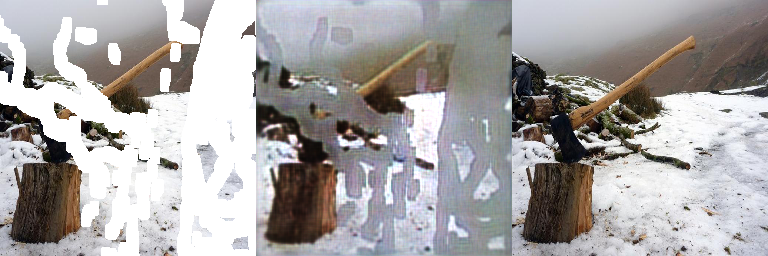

In [0]:
from IPython.display import Image
Image('outputs/predicted_pics/warm_up_generator/step_2000.png')

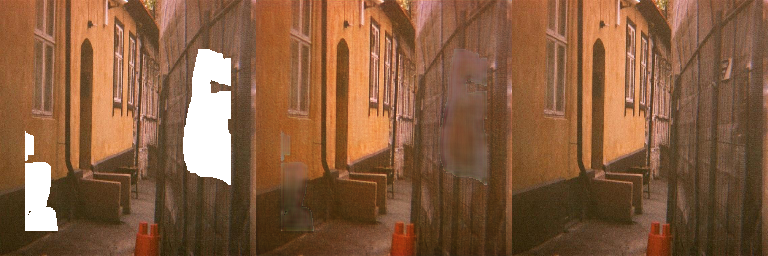

In [0]:
Image('outputs/predicted_pics/warm_up_generator/step_36000.png')

# Full Wasserstein GAN training mode: generator, local and global discriminators

In [0]:
!python inpainting-gmcnn-keras/runner.py --train_path images --mask_path mask -from_weights

Using TensorFlow backend.
INFO:tensorflow:Setting visible GPU to 0
Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
multiply_1 (Multiply)           (None, 256, 256, 3)  0           input_1[0][0]                    
                                                                 input_2[0][0]                    
_____________________________________________________________________

# Vizualise results of full model training

In [0]:
!ls outputs/predicted_pics/wgan/

step_000.png  step_1000.png  step_2000.png


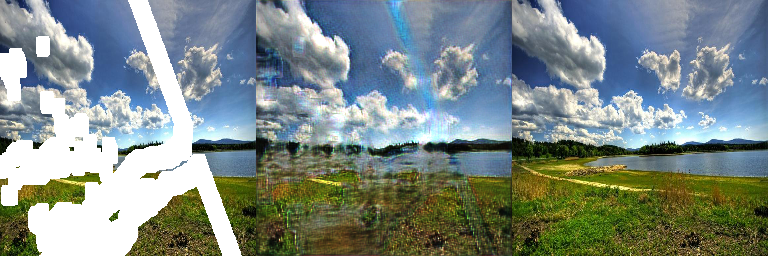

In [0]:
Image('outputs/predicted_pics/wgan/step_1000.png')

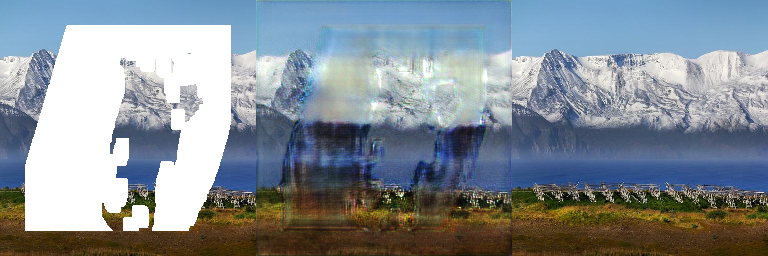

In [0]:
Image('outputs/predicted_pics/wgan/step_2000.png')

# Create zip file with model results and checkpoints

In [0]:
!zip -r outputs.zip outputs

  adding: outputs/ (stored 0%)
  adding: outputs/predicted_pics/ (stored 0%)
  adding: outputs/predicted_pics/wgan/ (stored 0%)
  adding: outputs/predicted_pics/wgan/step_1000.png (deflated 4%)
  adding: outputs/predicted_pics/wgan/step_000.png (deflated 3%)
  adding: outputs/predicted_pics/wgan/step_3000.png (deflated 3%)
  adding: outputs/predicted_pics/wgan/step_2000.png (deflated 2%)
  adding: outputs/predicted_pics/warm_up_generator/ (stored 0%)
  adding: outputs/predicted_pics/warm_up_generator/step_1000.png (deflated 4%)
  adding: outputs/predicted_pics/warm_up_generator/step_5000.png (deflated 5%)
  adding: outputs/predicted_pics/warm_up_generator/step_10000.png (deflated 3%)
  adding: outputs/predicted_pics/warm_up_generator/step_14000.png (deflated 3%)
  adding: outputs/predicted_pics/warm_up_generator/step_4000.png (deflated 4%)
  adding: outputs/predicted_pics/warm_up_generator/step_000.png (deflated 4%)
  adding: outputs/predicted_pics/warm_up_generator/step_9000.png (defl

In [0]:
ls

config/  inpainting-gmcnn-keras/  mask.zip  outputs.zip   val_large/
images/  mask/                    outputs/  sample_data/  val_large.tar


In order to download model result go to: Files -> content, right click on outputs.zip -> Download